# **Final Project 3: Ensemble**

Kelompok 7:
1. Fayza Chairunnisa Permana (PYTN-KS18-09)
2. Febriansyah Permana (PYTN-KS18-06)
3. Fenti Febriani (PYTN-KS18-04)

# **1. Introduction**

*   **Informasi Dataset**

Dataset didapatkan melalui link berikut:
https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

Dataset ini adalah database yang berisikan informasi terkait gagal jantung yang disebabkan oleh penyakit kardiovaskular dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Dataset terdiri dari 299 baris dan 13 kolom. Dari dataset ini, siswa diharapkan dapat memprediksi kematian akibat gagal jantung menggunakan model Random Forest Classifier

*   **Latar Belakang**

Kasus yang dipilih adalah salah satu penerapan pembelajaran yang telah dilakukan dalam program Studi Independen di Hacktiv8 Batch 5 terkait konsep Ensemble


* **Objective**

1. Mampu memahami konsep Ensemble
dengan model Random Forest Classifier

2. Mampu mempersiapkan data untuk digunakan dalam model Random Forest Classifier

3. Mampu mengimplementasikan Random Forest Classifier untuk membuat
prediksi


# **2. Import Pustaka yang akan digunakan**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# **3. Data Loading**

In [2]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.shape

(299, 13)

Dataframe diatas memiliki 299 baris dan 13 kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.columns.values

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **4. Data Cleaning**

## **Missing Value**

In [7]:
# Cek Missing Value
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Pada pengecekan missing value diatas tidak adanya missing value pada dataset tersebut

## **Duplicated Data**

In [8]:
# cek duplikasi data
df.duplicated().any()

False

Pada pengecekan duplikat data diatas tidak adanya duplikat data pada dataset tersebut

In [9]:
df.rename(columns={'DEATH_EVENT':'death_event','high_blood_pressure':'hypertension'}, inplace=True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Tidak terdapat missing value dan duplicate data diatas, selanjutnya kami merename/mengganti nama kolom menjadi nama yang mudah diingat yaitu 'DEATH_EVENT' menjadi 'death_event' dan 'high_blood_pressure' menjadi 'hypertension'

## Outlier

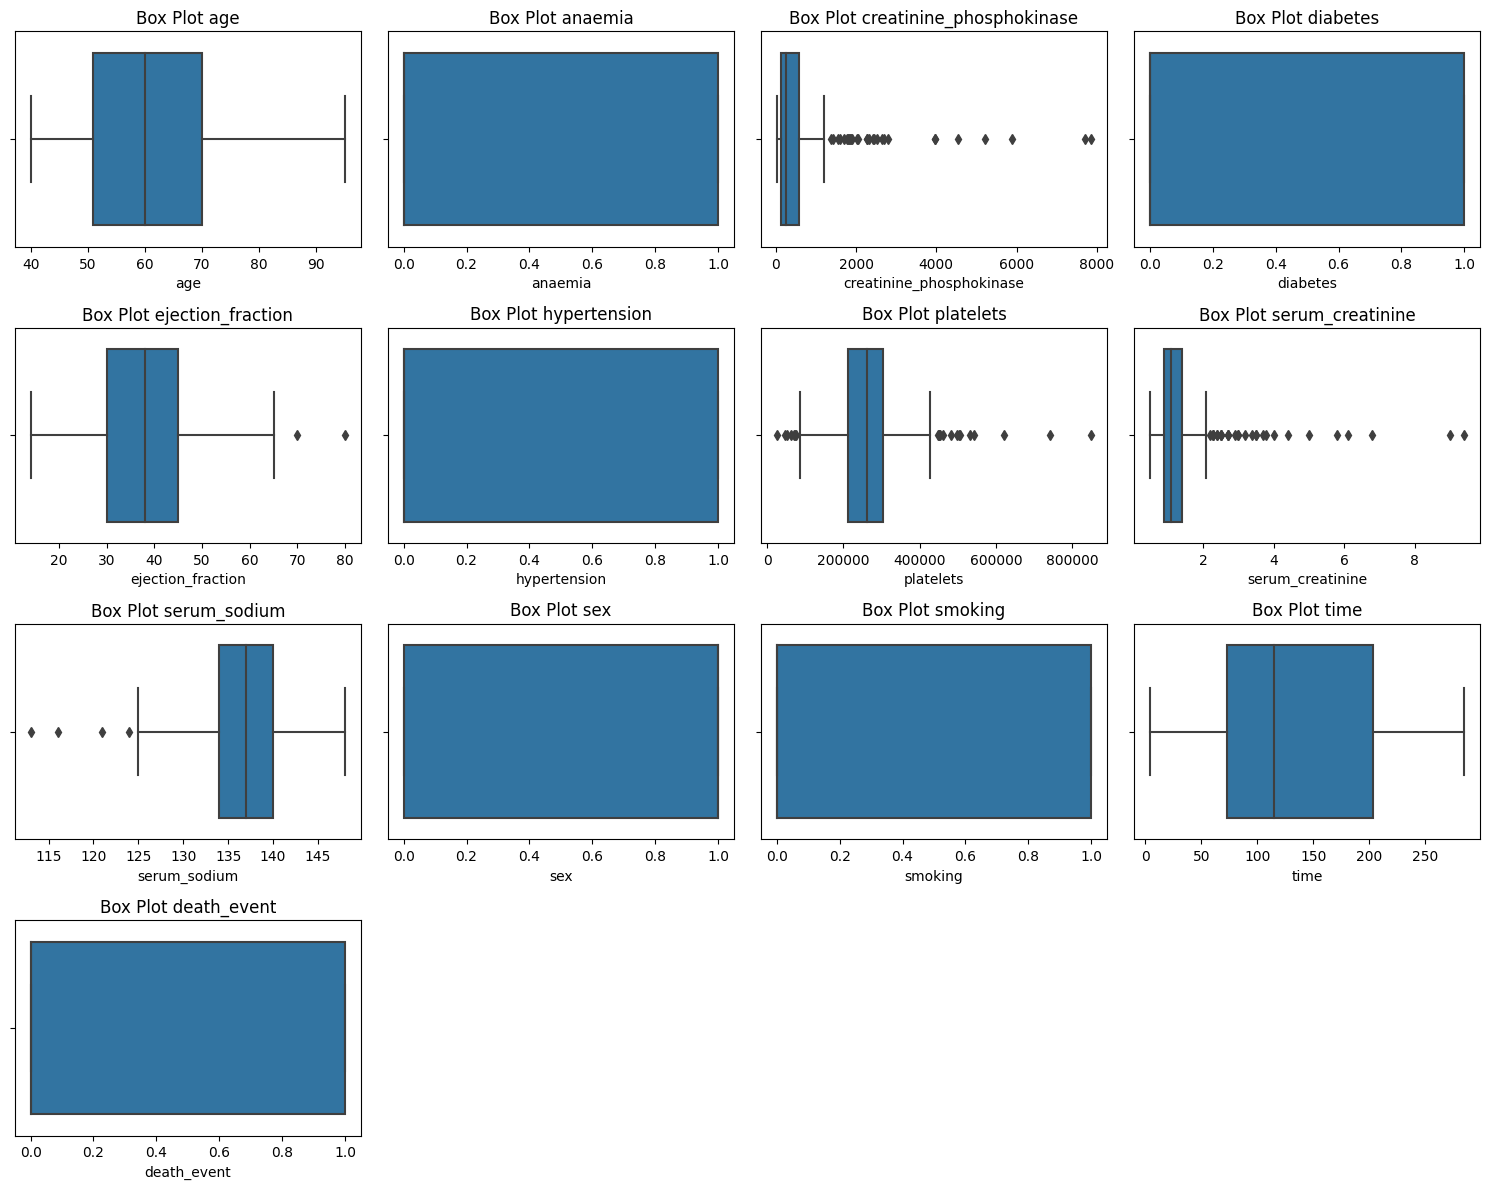

In [10]:
# Memvisualisasikan box plot untuk setiap kolom
plt.figure(figsize=(15, 12))
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot {column}')
    plt.tight_layout()

plt.show()

Berdasarkan grafik diatas, diketahui bahwa terdapat outlier pada kolom creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, dan serum_sodium

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

age                            19.0
anaemia                         1.0
creatinine_phosphokinase      465.5
diabetes                        1.0
ejection_fraction              15.0
hypertension                    1.0
platelets                   91000.0
serum_creatinine                0.5
serum_sodium                    6.0
sex                             1.0
smoking                         1.0
time                          130.0
death_event                     1.0
dtype: float64


In [12]:
len((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))

299

Outlier yang terdeteksi sejumlah dengan total row data, maka dari itu outlier tidak dibuang pada Dataset ini

# **5. Exploratory Data Analysis (EDA)**

In [13]:
KatCol= df.select_dtypes(include=['object']).columns.tolist()
NumCol = df.select_dtypes(exclude=['object']).columns.tolist()

In [14]:
NumCol

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'hypertension',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'death_event']

In [15]:
KatCol

[]

## **Central Tendency**

In [16]:
NumCol  = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'hypertension',
           'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'death_event']

central_tendency = pd.DataFrame({'Column':NumCol,
                                 'Mean':[df[i].mean()  for i in NumCol],
                                'Median':[df[i].median()  for i in NumCol],
                                'Minimum':[df[i].min() for i in NumCol],
                                'Modus': [df[i].mode()[0]  for i in NumCol]
                                 })
central_tendency['skew'] = np.where(central_tendency['Mean']< central_tendency['Median'], 'Left skewed', 'Right skewed')
central_tendency

,Column,Mean,Median,Minimum,Modus,skew
0,age,60.833893,60.0,40.0,60.00,Right skewed
1,anaemia,0.431438,0.0,0.0,0.00,Right skewed
2,creatinine_phosphokinase,581.839465,250.0,23.0,582.00,Right skewed
3,diabetes,0.418060,0.0,0.0,0.00,Right skewed
4,ejection_fraction,38.083612,38.0,14.0,35.00,Right skewed
5,hypertension,0.351171,0.0,0.0,0.00,Right skewed
6,platelets,263358.029264,262000.0,25100.0,263358.03,Right skewed
7,serum_creatinine,1.393880,1.1,0.5,1.00,Right skewed
8,serum_sodium,136.625418,137.0,113.0,136.00,Left skewed
9,sex,0.648829,1.0,0.0,1.00,Left skewed


Pada data diatas terdapat informasi bahwa:
*   rata-rata umur pasien yaitu berkisar 40 hingga 60 tahun
*   pasien memiliki sekitar 43% mengalami anemia 42% memiliki diabetes dan 35% memiliki hipertensi
*   pada jenis kelamin sekitar 65% pasien adalah laki-laki (1) dan 32% pasien merokok
*   untuk sekitar 32% pasien mengalami peristiwa kematian

Pada sebagian besar kolom distribusi data diatas cenderung condong ke kanan, dengan beberapa pengecualian seperti serum_sodium dan sex yang cenderung condong ke kiri.







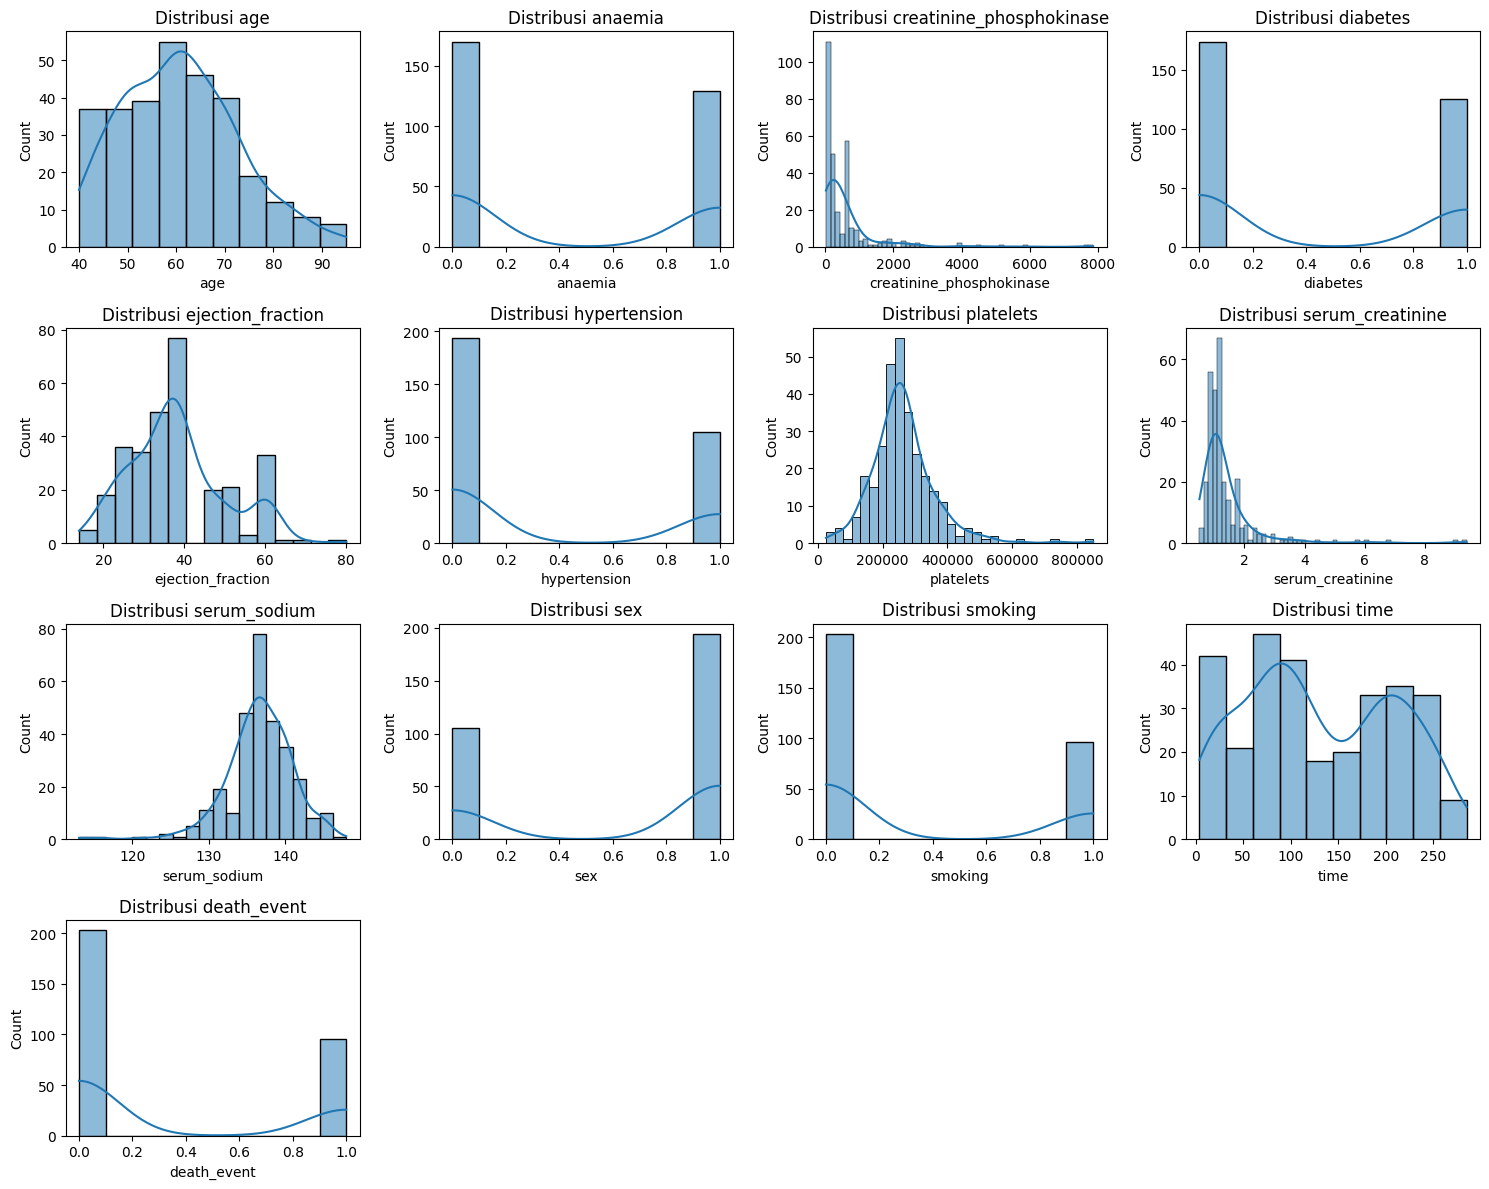

In [17]:
# Memvisualisasikan distribusi data untuk setiap kolom
plt.figure(figsize=(15, 12))
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.tight_layout()

plt.show()

## **Variability**

In [18]:
#melihat death_event berdasarkan kelompok usia
death_event_40s=df.loc[df['age']<50,'death_event'].value_counts()
death_event_50s=df.loc[(df['age'] >= 50 ) & (df['age']<60),'death_event'].value_counts()
death_event_60s=df.loc[(df['age'] >= 60 ) & (df['age']<70),'death_event'].value_counts()
death_event_70s=df.loc[(df['age'] >= 70 ) & (df['age']<80),'death_event'].value_counts()
death_event_80s=df.loc[(df['age'] >= 80 ) & (df['age']<90),'death_event'].value_counts()
death_event_90s=df.loc[(df['age'] >= 90 ) & (df['age']<100),'death_event'].value_counts()
#membuat data frame dari fitur death_event berdasarkan pengelompokan usia
df_deathByAge=pd.DataFrame({'40s':death_event_40s,'50s':death_event_50s,
             '60s':death_event_60s,'70s':death_event_70s,
             '80s':death_event_80s,'90s':death_event_90s})
df_deathByAge=df_deathByAge.transpose()
df_deathByAge

,0,1
40s,36,11
50s,62,20
60s,66,27
70s,32,20
80s,6,13
90s,1,5


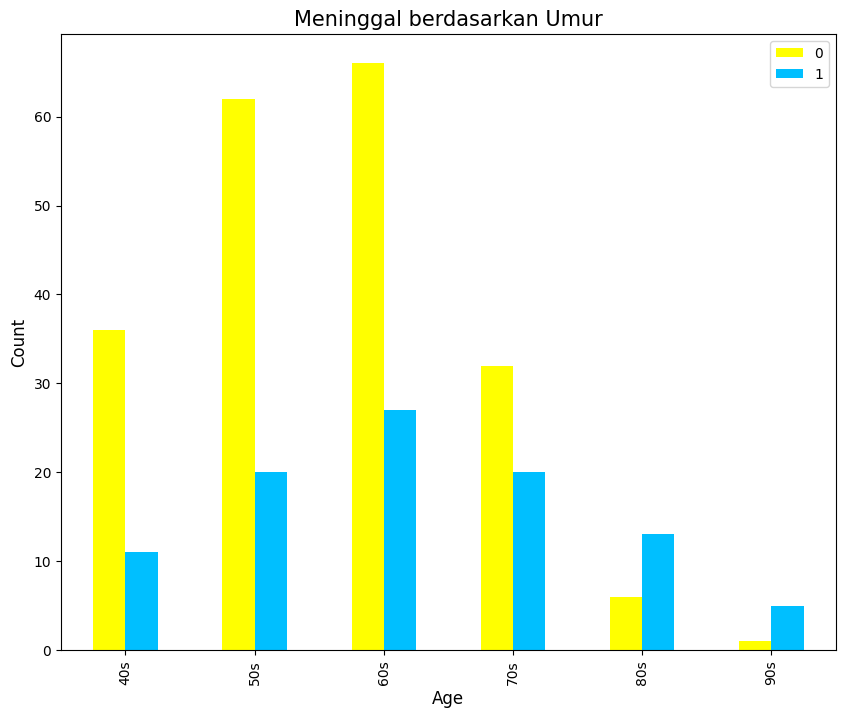

In [19]:
df_deathByAge.plot(kind='bar', figsize=(10,8),
                  color=['yellow','deepskyblue'])
plt.title('Meninggal berdasarkan Umur', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Pada bar chart diatas terdapat bahwa orang yang berumur 60 tahun-an paling rentan terkena penyakit jantung

In [20]:
#jumlah penderita anemia
anemia=len(df[df['anaemia']==1])
not_anemia=len(df[df['anaemia']==0])
#jumlah penderita diabetes
diabetes=len(df[df['diabetes']==1])
not_diabetes=len(df[df['diabetes']==0])
#jumlah penderita hipertensi
hypertension=len(df[df['hypertension']==1])
not_hypertension=len(df[df['hypertension']==0])
#membuat dataframe dari jumlah penderita diabetes, anemia, dan hipertensi
df_anemia_diabet_hyper=pd.DataFrame(
    {'keterangan':['anemia','diabetes','hipertensi'],
     'tidak':[not_anemia,not_diabetes,not_hypertension],
    'ya':[anemia,diabetes,hypertension],
    })
#mensetting index
df_anemia_diabet_hyper=df_anemia_diabet_hyper.set_index('keterangan')
df_anemia_diabet_hyper

,tidak,ya
keterangan,,
anemia,170,129
diabetes,174,125
hipertensi,194,105


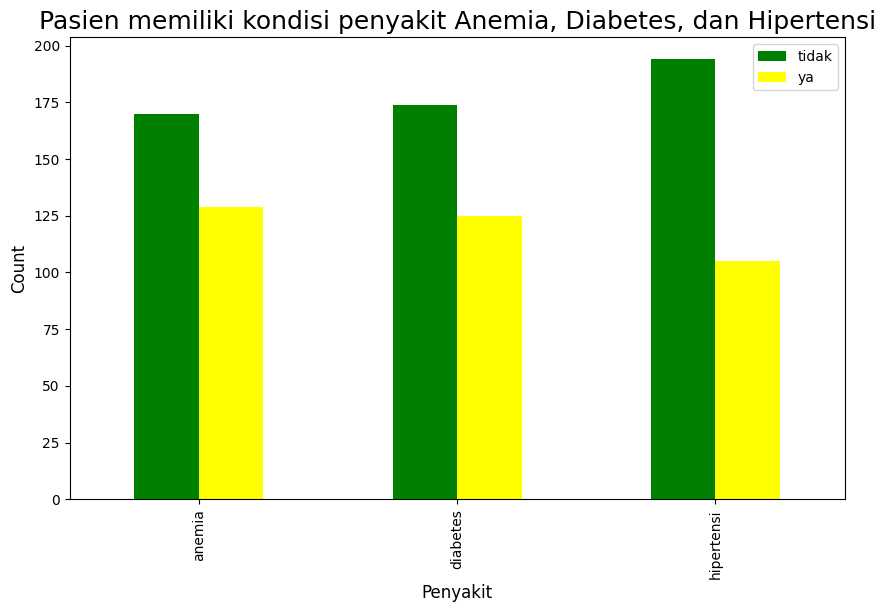

In [21]:
#visualisasi jumlah pasien anemia, diabetes, hipertensi
df_anemia_diabet_hyper.plot(kind='bar', figsize=(10,6),
                  color=['green','yellow'])
plt.title('Pasien memiliki kondisi penyakit Anemia, Diabetes, dan Hipertensi', fontsize=18)
plt.xlabel('Penyakit', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

Pada bar chart diatas, pasien penderita penyakit jantung  yang memiliki riwayat penyakit anemia cukup banyak dibandingkan dengan diabetes dan hipertensi

In [22]:
# Menghitung jumlah pasien yang meninggal dan tidak meninggal dengan kondisi anaemia
anemia1 = df.loc[(df['anaemia'] == 1) & (df['death_event'] == 1), 'death_event'].count()
anemia0 = df.loc[(df['anaemia'] == 1) & (df['death_event'] == 0), 'death_event'].count()

# Menghitung jumlah pasien yang meninggal dan tidak meninggal dengan kondisi diabetes
diabetes1 = df.loc[(df['diabetes'] == 1) & (df['death_event'] == 1), 'death_event'].count()
diabetes0 = df.loc[(df['diabetes'] == 1) & (df['death_event'] == 0), 'death_event'].count()

# Menghitung jumlah pasien yang meninggal dan tidak meninggal dengan kondisi hipertensi
hipertensi1 = df.loc[(df['hypertension'] == 1) & (df['death_event'] == 1), 'death_event'].count()
hipertensi0 = df.loc[(df['hypertension'] == 1) & (df['death_event'] == 0), 'death_event'].count()

# Menghitung jumlah pasien yang meninggal dan tidak meninggal dengan tiga kombinasi penyakit
ADH1 = df.loc[(df['anaemia'] == 1) & (df['diabetes'] == 1) & (df['hypertension'] == 1) & (df['death_event'] == 1), 'death_event'].count()
ADH0 = df.loc[(df['anaemia'] == 1) & (df['diabetes'] == 1) & (df['hypertension'] == 1) & (df['death_event'] == 0), 'death_event'].count()

# Menghitung jumlah pasien yang meninggal dan tidak meninggal dengan kombinasi penyakit Anemia Hipertensi
AH1 = df.loc[(df['anaemia'] == 1) & (df['hypertension'] == 1) & (df['death_event'] == 1), 'death_event'].count()
AH0 = df.loc[(df['anaemia'] == 1) & (df['hypertension'] == 1) & (df['death_event'] == 0), 'death_event'].count()

# Menghitung jumlah pasien yang meninggal dan tidak meninggal dengan kombinasi penyakit diabetes dan hipertensi
DH1 = df.loc[(df['diabetes'] == 1) & (df['hypertension'] == 1) & (df['death_event'] == 1), 'death_event'].count()
DH0 = df.loc[(df['diabetes'] == 1) & (df['hypertension'] == 1) & (df['death_event'] == 0), 'death_event'].count()

# Menghitung jumlah pasien yang meninggal dan tidak meninggal dengan kombinasi penyakit diabetes dan hipertensi
DA1 = df.loc[(df['diabetes'] == 1) & (df['anaemia'] == 1) & (df['death_event'] == 1), 'death_event'].count()
DA0 = df.loc[(df['diabetes'] == 1) & (df['anaemia'] == 1) & (df['death_event'] == 0), 'death_event'].count()

# Membuat Dataframe berdasarkan informasi yang telah dihitung
keterangan = ['anemia', 'diabetes', 'hipertensi',
              'Anemia, Diabetes dan Hipertensi', 'anemia dan hipertensi',
              'diabetes dan hipertensi', 'diabetes dan anemia']

meninggal = [anemia1, diabetes1, hipertensi1, ADH1, AH1, DH1, DA1]
tidak_meninggal = [anemia0, diabetes0, hipertensi0, ADH0, AH0, DH0, DA0]

sakit_df = pd.DataFrame({'Kondisi Pasien': keterangan, 'Meninggal': meninggal, 'Tidak Meninggal': tidak_meninggal})
persen = pd.DataFrame({'Meninggal(%)': round((sakit_df['Meninggal'] / (sakit_df['Meninggal'] + sakit_df['Tidak Meninggal'])) * 100, 2)})

sakit_df = pd.concat([sakit_df, persen], axis=1)
sakit_df


,Kondisi Pasien,Meninggal,Tidak Meninggal,Meninggal(%)
0,anemia,46,83,35.66
1,diabetes,40,85,32.00
2,hipertensi,39,66,37.14
3,"Anemia, Diabetes dan Hipertensi",6,11,35.29
4,anemia dan hipertensi,19,29,39.58
5,diabetes dan hipertensi,17,26,39.53
6,diabetes dan anemia,18,35,33.96


In [23]:
sakit_df.sort_values(by='Meninggal(%)', ascending=False)

,Kondisi Pasien,Meninggal,Tidak Meninggal,Meninggal(%)
4,anemia dan hipertensi,19,29,39.58
5,diabetes dan hipertensi,17,26,39.53
2,hipertensi,39,66,37.14
0,anemia,46,83,35.66
3,"Anemia, Diabetes dan Hipertensi",6,11,35.29
6,diabetes dan anemia,18,35,33.96
1,diabetes,40,85,32.00


Berdasarkan data diatas, kita dapat melihat bahwa riwayat penyakit tertentu, seperti anemia dan hipertensi atau diabetes dan hipertensi memiliki presentase kematian yang lebih tinggi yaitu sekitar 39% dibandingkan dengan riwayat penyakit lainnya

## **Data Corelation**

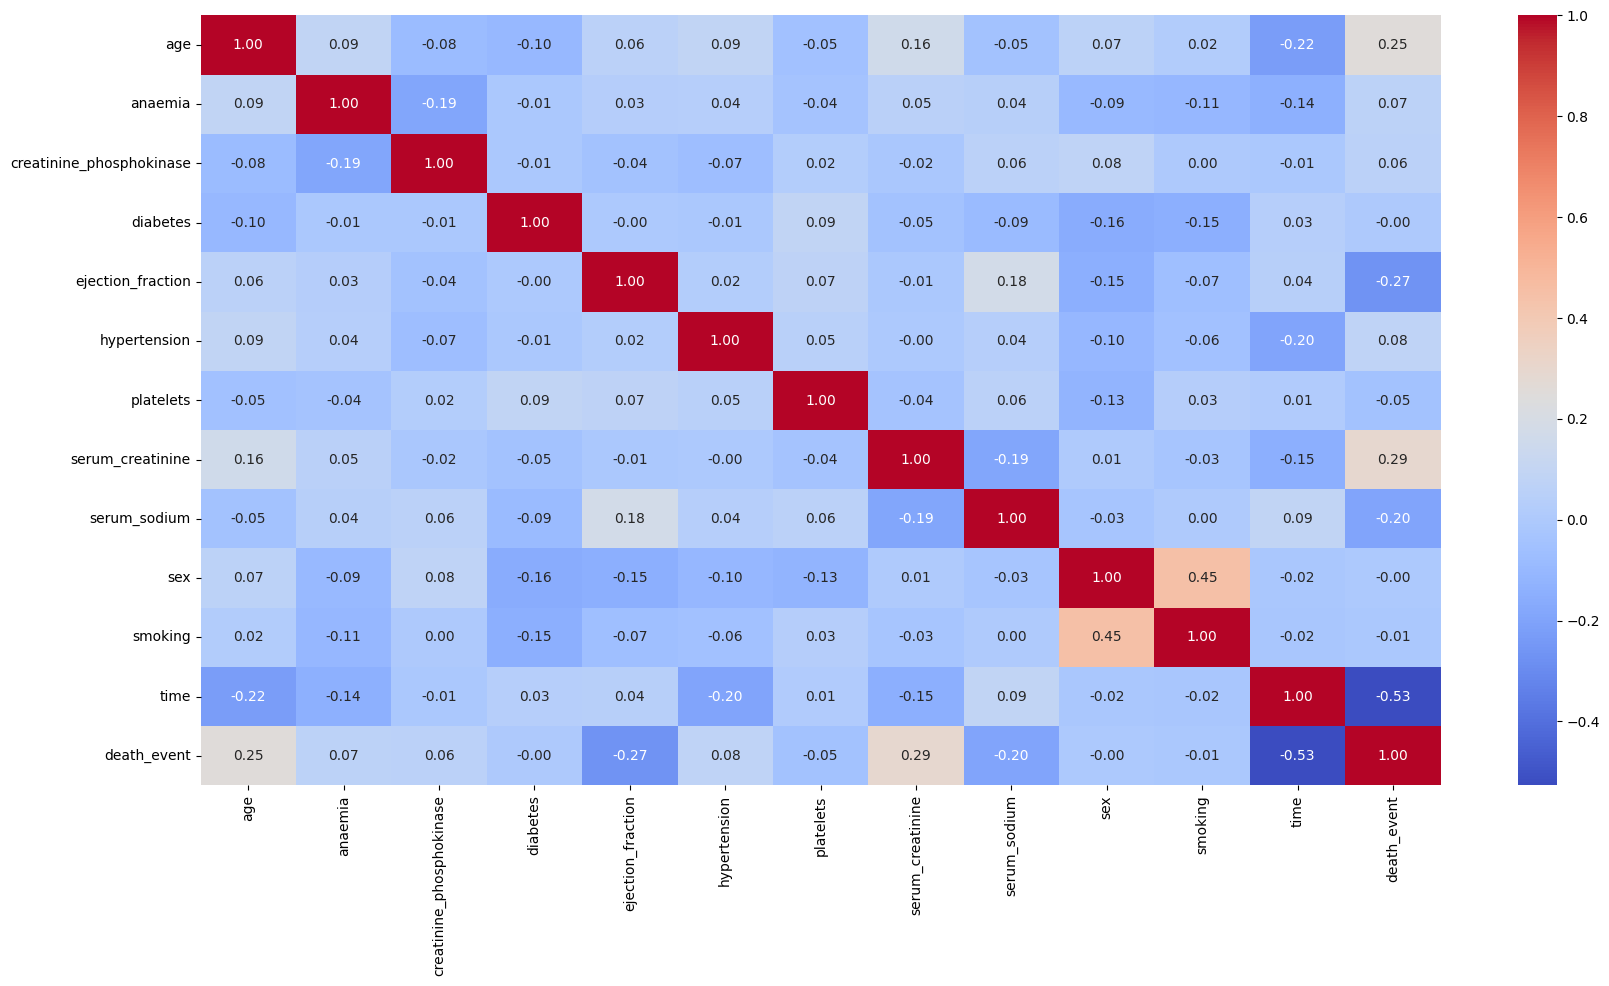

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Pada heatmap diatas, terdapat korelasi positif yaitu age dengan death_event, sedangkan korelasi negatif yaitu  death_event dengan time

# **6. Data Preprocessing**

## **Normalization**


In [25]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on your data and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame for easier analysis (optional)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [26]:
scaled_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,0.789474,0.0,0.713212,0.0,-1.2,1.0,0.032967,1.6,-1.166667,0.0,0.0,-0.853846,1.0
1,-0.263158,0.0,16.350161,0.0,0.0,0.0,0.014923,0.0,-0.166667,0.0,0.0,-0.838462,1.0
2,0.263158,0.0,-0.223416,0.0,-1.2,0.0,-1.098901,0.4,-1.333333,0.0,1.0,-0.830769,1.0
3,-0.526316,1.0,-0.298604,0.0,-1.2,0.0,-0.571429,1.6,0.000000,0.0,0.0,-0.830769,1.0
4,0.263158,1.0,-0.193340,1.0,-1.2,0.0,0.714286,3.2,-3.500000,-1.0,0.0,-0.823077,1.0


## **Data Partition dan Smote**

In [27]:
#Membagi fitur (x) dan target (y)
X = scaled_df.drop (columns='death_event')
y = scaled_df ['death_event']

In [28]:
# Membagi data yang di uji dan dilatih
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape, X_test.shape)

(239, 12) (60, 12)


# **7. Pendefinisian Model**

Random Forest Classifier adalah model klasifikasi yang bertujuan untuk memprediksi kategori atau label target dari suatu observasi berdasarkan fitur-fitur yang diberikan. Alasan menggunakan model Random Forest yaitu kemampuan untuk mengatasi overfitting yang mungkin terjadi, menangani data yang besar dan berbagai tipe data yang memberikan hasil prediksi yang akurat dan tepat.

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# **8. Pelatihan Model**

In [31]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred = rf_model.predict(X_test)
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1.])

# **9. Evaluasi Model**

In [33]:
y_pred = rf_model.predict(X_train)
print('Accuracy Data Training Logistic Regression: ', accuracy_score(y_train, y_pred))
y_pred1 = rf_model.predict(X_test)
print('Accuracy Data Uji Logristic Regression: ', accuracy_score(y_test, y_pred1))

Accuracy Data Training Logistic Regression:  1.0
Accuracy Data Uji Logristic Regression:  0.75


In [34]:
y_pred = rf_model.predict(X_test)

In [35]:
print('confussion matrix: ', confusion_matrix(y_test, y_pred))

confussion matrix:  [[33  2]
 [13 12]]


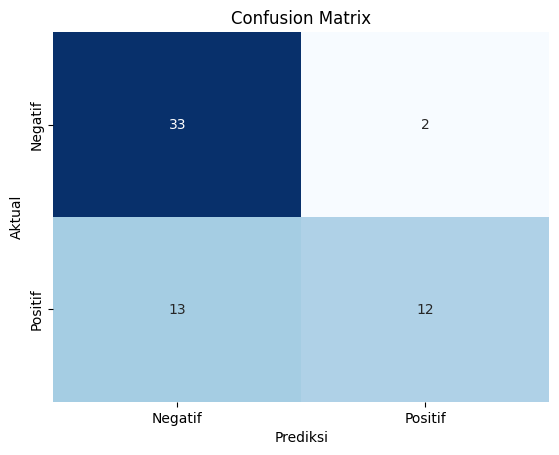

In [36]:
# Mendapatkan confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Negatif', 'Positif'],
            yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

**Kelas Negatif:**

 Pasien yang tidak meninggal.

**Kelas Positif:**

Pasien yang meninggal.


True Negative (TN):
Pasien yang diprediksi tidak meninggal dan memang tidak meninggal (33).

False Positive (FP): Pasien yang diprediksi meninggal, tetapi sebenarnya tidak meninggal (2).

False Negative (FN): Pasien yang diprediksi tidak meninggal, tetapi sebenarnya meninggal (13).

True Positive (TP): Pasien yang diprediksi meninggal dan memang meninggal (12).

In [37]:
print('Classification Report:', classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

         0.0       0.72      0.94      0.81        35
         1.0       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



# **10. Model Inference**

In [38]:
df_new = df.copy()
for kolom in df.columns:
    df_new[kolom] = np.random.permutation(df[kolom].values)

print("\nDataFrame Baru (Setelah Diacak):")
df_new


DataFrame Baru (Setelah Diacak):


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,50.0,0,132,1,30,1,418000.0,0.90,138,0,0,12,0
1,58.0,0,1211,0,30,1,254000.0,1.10,139,1,1,250,0
2,45.0,0,72,0,40,1,181000.0,1.00,134,0,0,72,0
3,63.0,1,146,0,60,0,255000.0,1.20,140,1,1,145,0
4,50.0,1,364,0,40,1,304000.0,1.70,135,0,0,65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,0,2334,1,45,1,254000.0,1.18,139,1,0,76,0
295,63.0,0,115,0,45,1,368000.0,6.80,140,1,0,74,0
296,60.0,1,571,1,38,1,185000.0,0.80,134,0,1,79,0
297,53.0,1,90,1,38,0,153000.0,0.90,132,0,0,71,1


In [39]:
# Menghapus kolom 'death_event' dari DataFrame
df_new = df.drop(columns='death_event')

# Menampilkan DataFrame baru
print("\nDataFrame Baru (Setelah drop column death_event):")
df_new


DataFrame Baru (Setelah drop column death_event):


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [40]:
# Melakukan prediksi pada data uji
y_pred = rf_model.predict(df_new)

In [41]:
# Menambahkan kolom 'Prediction' ke dalam DataFrame
df_new['Prediction'] = y_pred

In [42]:
# Mengganti nilai 0.0 atau 1.0 dengan label kelas
df_new['Prediction_Label'] = df_new['Prediction'].map({0.0: 'Tidak Meninggal', 1.0: 'Meninggal'})

# Menampilkan DataFrame dengan hasil prediksi yang sudah diubah menjadi label kelas
print(df_new[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
              'hypertension', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
              'smoking', 'time', 'Prediction_Label']])
df_new.head()

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     hypertension  platelets  serum_creatinine  serum_sodium  sex  smoking 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Prediction,Prediction_Label
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,0.0,Tidak Meninggal
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,0.0,Tidak Meninggal
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,0.0,Tidak Meninggal
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,0.0,Tidak Meninggal
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,0.0,Tidak Meninggal


# **11. Pengambilan Kesimpulan**

*   Terdapat bahwa rata-rata umur pasien dengan penyakit jantung yaitu berkisar 40 hingga 60 tahun.
*   Didapatkan pasien dengan riwayat penyakit anemia sebanyak 43% pasien, riwayat penyakit diabetes sebanyak 42% pasien dan riwayat penyakit hipertensi sebanyak 35% pasien.
*   Setelah melakukan perhitungan terdapat hasil yaitu anemia dan hipertensi atau diabetes dan hipertensi memiliki presentase kematian yang lebih tinggi yaitu sekitar 39% dibandingkan dengan riwayat penyakit lainnya.
*   Evaluasi model dengan menggunakan model Random Forest terdapat bahwa akurasi data training mencapai hampir 100% dan akurasi data uji sebesar 75%.
*   Setelah melakukan prediksi pada data baru dengan menggunakan model Random Forest menghasilkan "Tidak Meninggal" pada kematian akibat gagal jantung.





